In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
matches_df = pd.read_csv('datasets/matches.csv')
matches_df.head(10)

,MATCH_ID,MATCH_DATE,MATCH,PREDICTED_WINNER,MATCH_VALUE,M_GOT_IT,OVER_UNDER,OVER_UNDER_VALUE,O_GOT_IT
0,66,2022-12-19,PHILADELPHIA 76ERS - TORONTO RAPTORS,PHILADELPHIA 76ERS,1.33,YES,-229.5,1.39,YES
1,67,2022-12-19,CLEVELAND CAVALIERS - UTAH JAZZ,CLEVELAND CAVALIERS,1.39,YES,-228.5,1.44,YES
2,68,2022-12-19,ATLANTA HAWKS - ORLANDO MAGIC,ORLANDO MAGIC,3.30,NO,230.5,1.90,YES
3,69,2022-12-19,OKLAHOMA CITY THUNDER - PORTLAND TRAIL BLAZERS,PORTLAND TRAIL BLAZERS,1.36,NO,226.5,1.70,YES
4,70,2022-12-19,HOUSTON ROCKETS - SAN ANTONIO SPURS,HOUSTON ROCKETS,1.58,NO,-235.5,1.44,YES
5,71,2022-12-19,NEW ORLEANS PELICANS - MILWAUKEE BUCKS,MILWAUKEE BUCKS,1.85,YES,-231.5,1.66,NO
6,72,2022-12-19,MINNESOTA TIMBERWOLVES - DALLAS MAVERICKS,DALLAS MAVERICKS,1.63,NO,222.5,1.52,NO
7,73,2022-12-19,PHOENIX SUNS - LOS ANGELES LAKERS,PHOENIX SUNS,1.24,YES,226.5,1.62,YES
8,74,2022-12-19,SACRAMENTO KINGS - CHARLOTTE HORNETS,SACRAMENTO KINGS,1.20,NO,240.5,1.89,YES
9,194,2023-01-06,PHILADELPHIA 76ERS - CHICAGO BULLS,PHILADELPHIA 76ERS,1.49,NO,-234.5,1.52,NO


In [3]:
matches_df.set_index('MATCH_ID')

,MATCH_DATE,MATCH,PREDICTED_WINNER,MATCH_VALUE,M_GOT_IT,OVER_UNDER,OVER_UNDER_VALUE,O_GOT_IT
MATCH_ID,,,,,,,,
66,2022-12-19,PHILADELPHIA 76ERS - TORONTO RAPTORS,PHILADELPHIA 76ERS,1.33,YES,-229.5,1.39,YES
67,2022-12-19,CLEVELAND CAVALIERS - UTAH JAZZ,CLEVELAND CAVALIERS,1.39,YES,-228.5,1.44,YES
68,2022-12-19,ATLANTA HAWKS - ORLANDO MAGIC,ORLANDO MAGIC,3.30,NO,230.5,1.90,YES
69,2022-12-19,OKLAHOMA CITY THUNDER - PORTLAND TRAIL BLAZERS,PORTLAND TRAIL BLAZERS,1.36,NO,226.5,1.70,YES
70,2022-12-19,HOUSTON ROCKETS - SAN ANTONIO SPURS,HOUSTON ROCKETS,1.58,NO,-235.5,1.44,YES
...,...,...,...,...,...,...,...,...
471,2023-02-13,CHICAGO BULLS - ORLANDO MAGIC,ORLANDO MAGIC,2.65,YES,226.5,1.96,NO
472,2023-02-13,OKLAHOMA CITY THUNDER - NEW ORLEANS PELICANS,OKLAHOMA CITY THUNDER,1.72,NO,236.5,1.83,NO
473,2023-02-13,DALLAS MAVERICKS - MINNESOTA TIMBERWOLVES,DALLAS MAVERICKS,1.28,NO,-236.5,1.59,NO


In [5]:
matches_df = matches_df.rename(columns=str.lower)
matches_df.columns

Index(['match_id', 'match_date', 'match', 'predicted_winner', 'match_value',
       'm_got_it', 'over_under', 'over_under_value', 'o_got_it'],
      dtype='object')

In [7]:
matches_df.dtypes

match_id              int64
match_date           object
match                object
predicted_winner     object
match_value         float64
m_got_it             object
over_under          float64
over_under_value    float64
o_got_it             object
dtype: object

In [8]:
matches_df['match_date'] = pd.to_datetime(matches_df['match_date'])

In [9]:
successful_bets = matches_df[matches_df['m_got_it'] == 'YES']

In [10]:
grouped_bets = successful_bets.groupby('predicted_winner').agg({'match_value':'mean'})

<function matplotlib.pyplot.show(close=None, block=None)>

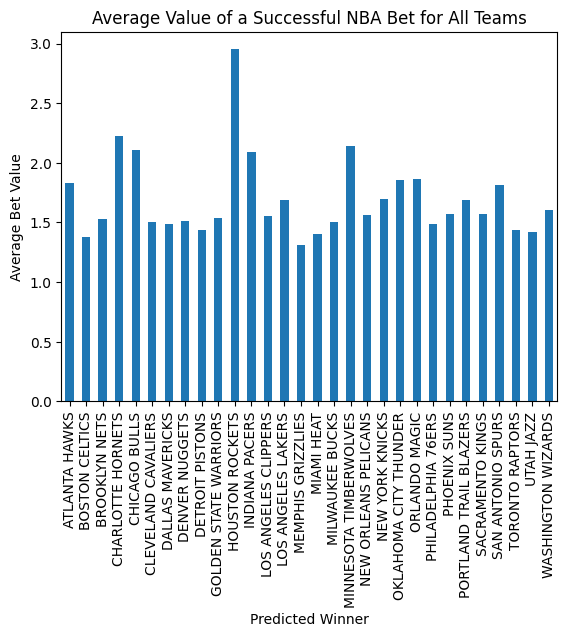

In [11]:
grouped_bets.plot(kind='bar', legend=None)
plt.title('Average Value of a Successful NBA Bet for All Teams')
plt.xlabel('Predicted Winner')
plt.ylabel('Average Bet Value')
plt.show

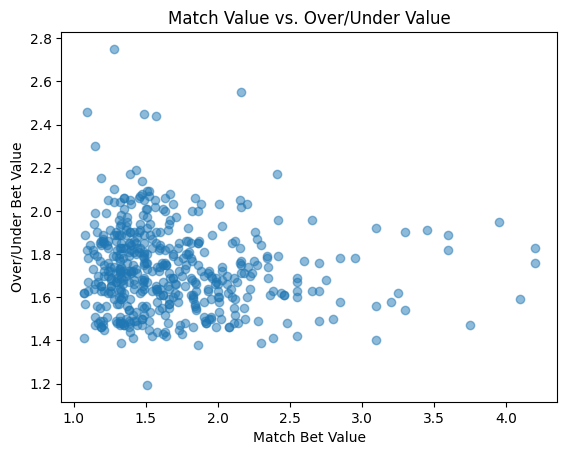

In [14]:
plt.scatter(matches_df['match_value'], matches_df['over_under_value'], alpha=0.5)

plt.title('Match Value vs. Over/Under Value')
plt.xlabel('Match Bet Value')
plt.ylabel('Over/Under Bet Value')
plt.show()